<p style="text-align: center;"><font size="8"><b>While Loops</b></font><br>


Last chapter (chapter 4 in Goldwasser and Letscher) introduced us to two control structures, for loops and conditional (if) statements. Chapter 5 introduces more control structures. Today we will learn about *while loops*.

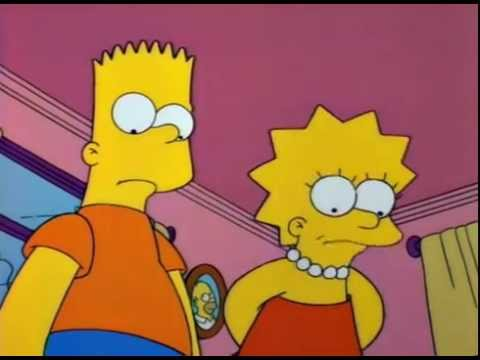

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('E6Yc3hzVsBc')

We've seen that for loops allow for repetition by iterating over a well defined sequence of elements. Sometimes we may need to express repetition even though we cannot know the precise number of iterations in advance. To do this we use a *while loop* with the syntax:

    while condition:
        body

As with if statements, the condition can be an arbitarary boolean expression and the body is an indented block of code.

![while statement flow chart](images/while_flow.png)

We saw index based for loops last week. 

In [3]:
guests = ["Kirk", "Spock", "Bones", "Scotty", "Uhura", "Sulu", "Chekov"]

for i in range(len(guests)):
    print(str(i+1)+".", guests[i])

1. Kirk
2. Spock
3. Bones
4. Scotty
5. Uhura
6. Sulu
7. Chekov


We can do the exact same thing using while loops.

In [6]:
guests = ["Kirk", "Spock", "Bones", "Scotty", "Uhura", "Sulu", "Chekov"]

i = 0
while i < len(guests):
    print(str(i + 1) + ".", guests[i])
    i += 1

1. Kirk
2. Spock
3. Bones
4. Scotty
5. Uhura
6. Sulu
7. Chekov


Note that we must initialize a counter `i` *outside* the while loop and manually increment it each iteration.

## Exercise

Consider the following for loop that prints out a countdown.

In [8]:
for count in range(10,0,-1):
    print(count)    
print("BLASTOFF")

10
9
8
7
6
5
4
3
2
1
BLASTOFF


Write an equivalent expression using a while loop.

## Infinite Loops

When using for loops the number of iterations is naturally bounded based on the length of the original sequence. When working with a while loop the number of iterations is not explicitly bounded, but determined based on the loop condition. 

This can lead to a serious problem known as an *infinite loop*. In infinite loops the condition never changes to false, so the loop keeps repeating itself indefinitely. 

Consider this blatant example:

    while True:
        print("Hello")
        
The loop condition is never false, so "Hello" gets printed over and over again. If you run code and encounter an infinte loop you can exit it by typing control-c.

To avoid infinite loops often we add a counter to keep track of the number of iterations. If we reach a maximum number of iterations, the loop condition becomes false and the loop terminates.

## Example

Suppose we want to solve the equation $x = \cos(x)$. There is no analytic solution to this equation, however we can still "solve" it using a technique known as a **fixed point iteration**. The idea is as follows. 

We guess a solution to the equation, and call this guess $x_0$. We then generate a new approximation $x_1 = \cos(x_0)$ and repeat. In general we have that $x_{k+1} = \cos(x_k)$. 

Once the difference between $x_k$ and $x_{k+1}$ becomes small, we have found a goood approximation to the solution.

What does it mean for the difference between $x_k$ and $x_{k+1}$ to be small? 

If $x_{k}$ is exactly $\sin(x_k)$, then $x_{k+1} = x_k$. Now, $x_k$ in general may be irrational, so this may never happen. Even though we are dealing with floating point numbers, meaning that we require only the first 16 digits to match, this may take an unreasonably large number of steps, if it happens at all.

We will need to set a tolerance therefore. If $|x_k - x_{k+1}|$ is less than this tolerance, then we will exit our loop and say the solution is $x_{k+1}$. We will also keep track of the number of iterations $k$. If $k$ is larger than some maximum number of iterations, we will exit our loop.

So how do we code this up? 

We will need to keep track of a few things:
* $x_k$
* $x_{k+1}$
* $|x_k - x_{k+1}|$
* $k$ (number of iterations)


In [33]:
import numpy as np

# define tolerance and maximum iterations
tol = 1e-8
max_it = 100

x0 = 0
x1 = np.cos(x0)
k = 0 # iteration number

while abs(x0 - x1) > tol and k < max_it:
    
    # set x0 to x1 (x0 is x_k)
    x0 = x1
    
    # compute x_{k+1} from x_k, store in x1
    x1 = np.cos(x0)
    
    # increment counter 
    k += 1

print("solution found after", k, "iterations:")
print("x =", x1)
print("cos(x) = ", np.cos(x1))

solution found after 46 iterations:
x = 0.739085136647
cos(x) =  0.739085130904


This is an example of a **root finding method**. Root finding methods are useful for solving nonlinear equations. 

Next class we will look at a better root finding method.

## Finding the Greatest Common Divisor

Suppose we want to find the greatest common divsor of two integers. In other words, given two integers $u$ and $v$, we want to find the largest integer $w$, such that $w$ is a factor of both $u$ and $v$. 

A na&iuml;ve approach is to start with a guess of the smallest of $u$ and $v$ and check if it is a factor of both $u$ and $v$. If it is, we are done. If not, decrease our guess by 1 and try again.

In [4]:
# declare u and v
u = 204
v = 36

# set initial guess
w = min(u,v) 

# start while loop
while u%w >0  or v%w > 0:
    w = w - 1
    
print("The GCD is", w)

The GCD is 12


Note that this loop is guaranteed to terminate, since 1 is always a common factor of any two numbers. This is not the most efficient approach. 

## Exercise

Implement Euclid's algorithm for finding the greatest common divisor of two numbers, as shown below:
![euclid's algorithm](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter2/images/gcd2.png?raw=true)

## Fibonacci Numbers Revisited

Recall the Fibonacci numbers are defined by:
$$ F_i = \begin{cases} 0 & i = 0\\ 1 & i = 1\\ F_{i-1} + F_{i-2} & \text{otherwise}\end{cases}$$

We computed the first $N$ of these numbers earlier using for loops.

Let's say we want to compute all Fibonacci numbers less than 10,000. How many of these numbers are there? 

There's not an obvious answer to that question, but if we use a while loop we don't have to know.

In [16]:
# create empty list to store the Fibonacci numbers
fib = []

# 0 and 1 are the first 2
fib.append(0)
fib.append(1)

# while the last number in the list is less than 10,000
fib_next = fib[0] + fib[1]

while (fib_next < 10000):
    
    # append new Fibonacci number
    fib.append(fib_next)
    
    # compute next number
    fib_next = fib[-2] + fib[-1]
    
print(fib)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


## Exercise

Write a program that computes all Padovan numbers under 30,000. 
Recall that the Padovan numbers are defined by the recurrence relation:

$$ P_i = P_{i-2} + P_{i-3},$$
with $P_0 = P_1 = P_2 = 1$.

## While Loops and For Loops

Programatically speaking, for loop and while loops are equivalent. In both cases you are telling the program to repeat a sequence of instructions (i.e. loop over the instructions). This means that anything written as a for loop can be written as a while loop and vice versa. 

Consider the previous example. This equivalent implenentation uses a for loop:

In [17]:
# create empty list to store the Fibonacci numbers
fib = []

# 0 and 1 are the first 2
fib.append(0)
fib.append(1)

# loop until some arbitrarily large number
for i in range(10000):
    
    # compute new Fibonacci number, which is sum of the last two numbers already in the list
    fib_next = fib[-2] + fib[-1]
    
    if (fib_next > 10000):
        break
    
    fib.append(fib_next)
        
print(fib)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


Likewise to generate the first $N$ Fibonacci numbers we could have used a while loop:

In [5]:
# create empty list to store the Fibonacci numbers
fib = []

# declare N, set counter i to 2
N = 10

# 0 and 1 are the first 2
fib.append(0)
fib.append(1)

# loop until some arbitrarily large number
while len(fib) < N:
    
    # append new Fibonacci number, which is sum of the last two numbers already in the list
    fib.append(fib[-2] + fib[-1])
    
print(fib)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


The choice to use a while loop or a for loop depends on the type of problem you are solving. With experience it will become obvious which loop to use. 

As a rule of thumb a for loop makes sense if you know beforehand the number of iterations. If you don't know the number of iterations, a while loop is probably a better choice. 

# Nested Loops

The body of a for loop can contain a while loop and vice versa. For example, let's say that we are trying to roll a six on a six sided dice. How many rolls, on average, does it take to roll a six? What is the variance? 

We can compute these quantities using Monte Carlo techniques.

In [14]:
import numpy as np

N = 1000 # number of trials
rolls = [] # initialize empty list that will keep track of the number of rolls needed to roll a six

for i in range(N):
    
    r = np.random.randint(1,7)
    count = 1
    
    # keep rolling as long as r is not 6
    while r != 6:
        
        # increment count
        count += 1        
        r = np.random.randint(1,7)
        
    rolls.append(count)
    
# convert rolls to numpy array to compute average and variance
rolls = np.asarray(rolls)
mu = np.average(rolls)
sigma2 = np.average((rolls - mu)**2)

print("average:", mu)
print("variance:", sigma2)

average: 5.987
variance: 29.704831


As you may have guessed, it takes around 6 rolls on average to roll a 6. We can also plot a histogram of this data to get a sense for what the distribution looks like.

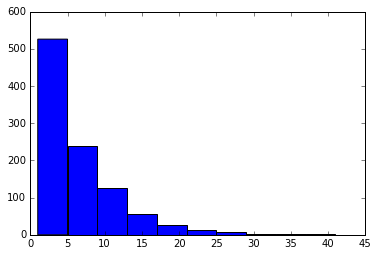

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(rolls);

## Exercise

Assume you are trying to roll snake eyes (two ones) on two six sided dice. How many attempts does it take on average for this to happen? Using Monte Carlo techniques, compute the mean and variance, and plot a histogram.